# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combination = mouse_metadata.merge(study_results, on='Mouse ID', how='left')
# Display the data table for preview
data_combination.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
number_of_mice = len(data_combination["Mouse ID"].unique())
number_of_mice

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_combination.loc[data_combination.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = data_combination.loc[data_combination["Mouse ID"] == 'g989']
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_combination[data_combination['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean, 
    "Median Tumor Volume": median, 
    "Tumor Volume Variance": variance, 
    "Tumor Volume Std. Dev.": stdv, 
    "Tumor Volume Std. Err.": sem})
summary_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = data_combination.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

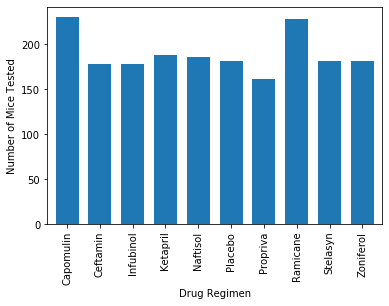

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
from turtle import width

timepoint_plot = data_combination.groupby(["Drug Regimen"]).count()["Mouse ID"]
timepoint_plot.plot(kind="bar", width=0.7, linewidth=0.7, figsize=(6,4))

#set chart title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#show chart and set layout
plt.show()
# plt.tight_layout()


<function matplotlib.pyplot.legend(*args, **kwargs)>

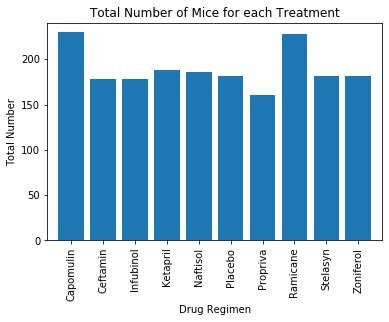

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x-axis and tick locations
x_axis = np.arange(len(timepoint_plot))
tick_locations = [value for value in x_axis]

# Defining data to be generated
plt.figure(figsize=(6,4))
plt.bar(x_axis, timepoint_plot, alpha=1, align='center')
plt.xticks(tick_locations, timepoint_plot.index.values, rotation="vertical")

# Setting x and y limit
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoint_plot)+10)

plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")
plt.legend



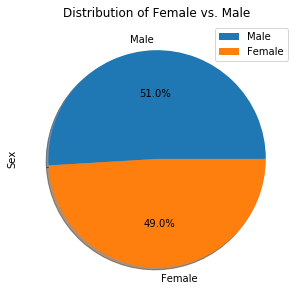

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean_df['Sex'].value_counts()
gender_count
gender_df = pd.DataFrame(gender_count)
pandas_plot = gender_df.plot.pie(y='Sex', figsize=(5,5), autopct="%1.1f%%", shadow=True, startangle=360, title='Distribution of Female vs. Male')


Text(0.5, 1.0, 'Distribution of Female vs. Male')

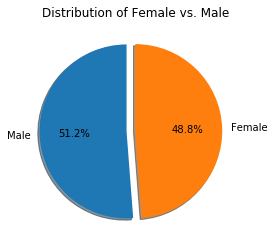

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df
labels = ['Male', 'Female']
sizes = [968, 922]
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90,)
plt.title('Distribution of Female vs. Male')


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
lasttimepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
lasttimepoint = lasttimepoint.reset_index()

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timemergeclean_df = lasttimepoint.merge(clean_df, on =["Mouse ID","Timepoint"], how = "left")
# timemergeclean_df.head()

In [52]:
# Put treatments into a list for for loop (and later for plot labels)
drugregimens = ['Capomulin', 'Ceftamin', 'Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drugregimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorcount = timemergeclean_df.loc[timemergeclean_df["Drug Regimen"]== i, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorvol.append(tumorcount)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorcount.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = tumorcount.loc[(tumorcount < lowerbound) | (tumorcount > upperbound)]
    print(f"{i}'s potential outliers: \n{outliers}\n")

Capomulin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)



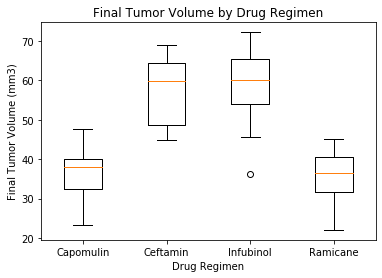

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Create a list to use as labels and dataframe
plt.boxplot(tumorvol)
plt.title('Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], drugregimens)
plt.show()

## Line and Scatter Plots

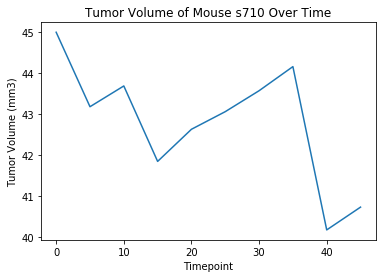

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = data_combination.loc[(data_combination["Mouse ID"] == "s710")]
line_plot = line_plot.set_index("Timepoint")
line_plot

#Plot
line_plot["Tumor Volume (mm3)"].plot()
plt.title("Tumor Volume of Mouse s710 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


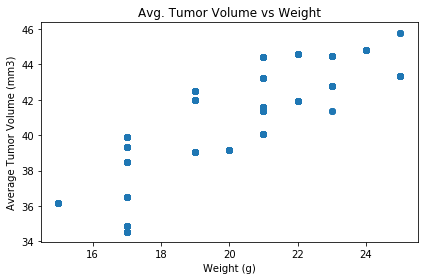

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_data = data_combination.loc[data_combination['Drug Regimen']=='Capomulin']

#cap_data_avg = merged_df.groupby('Mouse ID')['Weight (g)','Tumor Volume (mm3)'].mean()
cap_data_avg = data_combination.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_data_avg.sort_values().reset_index()

merge_cap = pd.merge(cap_data, cap_data_avg, on='Mouse ID')
merged_cap_final = merge_cap.rename(columns={'Tumor Volume (mm3)_y':'Avg. Tumor Volume'})
merged_cap_final.head()
plt.scatter(merged_cap_final['Weight (g)'], merged_cap_final['Avg. Tumor Volume'])
plt.title('Avg. Tumor Volume vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


## Correlation and Regression

 The correlation coefficient b/w the mouse weight and average tumor volume (0.8343958614425948, 6.49573765613983e-61)


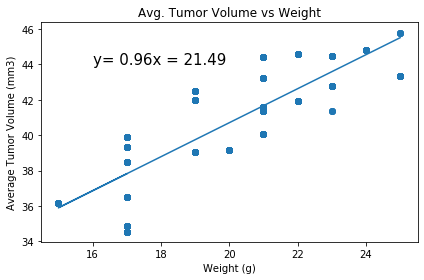

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_data = data_combination.loc[data_combination['Drug Regimen']=='Capomulin']

#cap_data_avg = merged_df.groupby('Mouse ID')['Weight (g)','Tumor Volume (mm3)'].mean()
cap_data_avg = data_combination.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_data_avg.sort_values().reset_index()

merge_cap = pd.merge(cap_data, cap_data_avg, on='Mouse ID')
merged_cap_final = merge_cap.rename(columns={'Tumor Volume (mm3)_y':'Avg. Tumor Volume'})
merged_cap_final.head()
#calculations
correlation = st.pearsonr(merged_cap_final['Weight (g)'], merged_cap_final['Avg. Tumor Volume'])
print(f' The correlation coefficient b/w the mouse weight and average tumor volume {correlation}')
x = merged_cap_final['Weight (g)']
y = merged_cap_final['Avg. Tumor Volume'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_cap_final['Weight (g)'], merged_cap_final['Avg. Tumor Volume'])
regress_values = x* slope + intercept 
line_eq = 'y= ' + str(round(slope,2)) + 'x = ' + str(round(intercept,2))



plt.scatter(merged_cap_final['Weight (g)'], merged_cap_final['Avg. Tumor Volume'])
plt.plot(x, regress_values)
plt.annotate(line_eq,(16,44), fontsize=15)
plt.title('Avg. Tumor Volume vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()
